<a href="https://colab.research.google.com/github/ChameliMasha/image_processing_assignment2/blob/main/EE7204_assignment_2_3699.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from queue import Queue
import matplotlib.pyplot as plt

In [11]:
# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, std_dev=25):
    row, col = image.shape
    gauss = np.random.normal(mean, std_dev, (row, col))
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    return noisy

In [12]:
# Function to implement Otsu's thresholding algorithm
def otsu_thresholding(image):
    # Converting image to uint8 dtype
    image = image.astype(np.uint8)

    # Compute histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Normalize histogram
    hist_norm = hist.ravel() / hist.sum()

    #calculating probabilities
    intensity_values = np.arange(256)
    prob = intensity_values * hist_norm

    # Calculating cumulative sums
    cum_sum = np.cumsum(hist_norm)
    cum_sum_rev = np.cumsum(hist_norm[::-1])[::-1]

    # Calculating class variance
    mean = np.cumsum(intensity_values * hist_norm)
    mean_rev = np.cumsum(intensity_values[::-1] * hist_norm[::-1])[::-1]

    sigma_b_squared = cum_sum * cum_sum_rev * ((mean_rev / cum_sum_rev - mean / cum_sum) ** 2)

    optimum_threshold = np.argmax(sigma_b_squared)

    return optimum_threshold


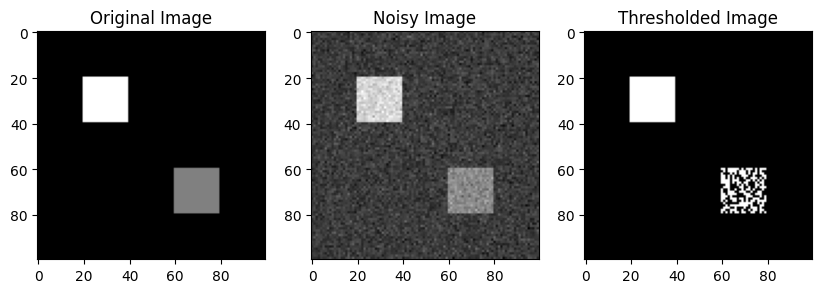

In [13]:
# Main function
if __name__ == "__main__":
    # Create a test image with 2 objects and background
    image = np.zeros((100, 100), dtype=np.uint8)
    image[20:40, 20:40] = 255
    image[60:80, 60:80] = 128

    # Adding Gaussian noise to the image
    noisy_image = add_gaussian_noise(image)

    # Applying Otsu's thresholding algorithm
    threshold = otsu_thresholding(noisy_image)

    # Threshold the image
    _, thresholded_image = cv2.threshold(noisy_image, threshold, 255, cv2.THRESH_BINARY)

    # Display the images
    plt.figure(figsize=(10, 6))
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(132)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Noisy Image')
    plt.subplot(133)
    plt.imshow(thresholded_image, cmap='gray')
    plt.title('Thresholded Image')
    plt.show()

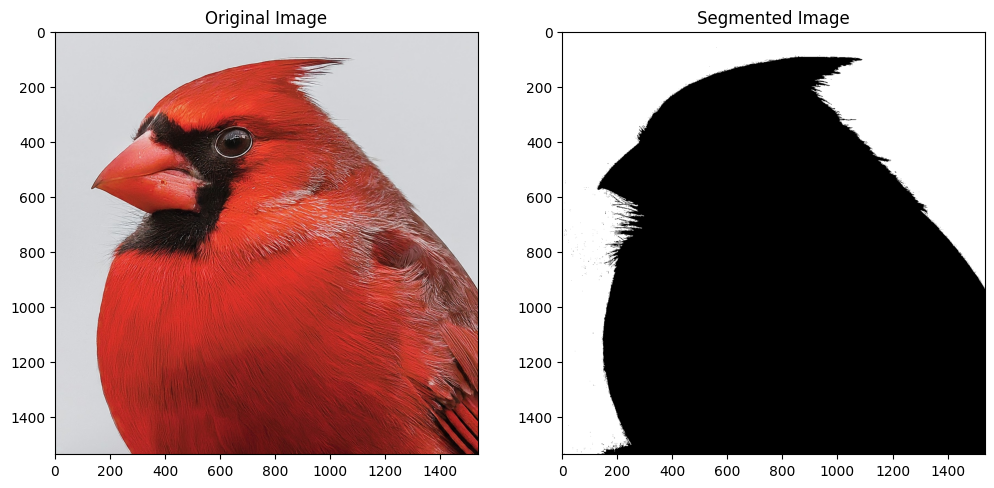

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function for region growing segmentation
def region_growing(image, seeds, threshold):
    height, width = image.shape
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image)
    stack = []

    # Convert image to float32 to avoid overflow issues
    image = image.astype(np.float32)

    for seed in seeds:
        stack.append(seed)

    while len(stack) > 0:
        current_point = stack.pop()
        y, x = current_point

        if visited[y, x] == 1:
            continue

        visited[y, x] = 1

        # Use float32 type for comparison
        if abs(image[y, x] - image[seeds[0][0], seeds[0][1]]) <= threshold:
            segmented[y, x] = 255

            if y - 1 >= 0:
                stack.append((y - 1, x))
            if y + 1 < height:
                stack.append((y + 1, x))
            if x - 1 >= 0:
                stack.append((y, x - 1))
            if x + 1 < width:
                stack.append((y, x + 1))

    return segmented

# Main function
if __name__ == "__main__":
    # Load the image of a red flower on a white background
    color_image = cv2.imread('red_bird.jpg')
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Define seeds for region growing; you might need to adjust this
    seeds = [(30, 30)]

    # Set threshold for region growing; adjust as needed for your image
    threshold = 10

    # Perform region growing segmentation
    segmented_image = region_growing(gray_image, seeds, threshold)

    # Display original image and segmented image
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(122)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.show()
